# Welcome to the MUFaSAA Dataset.

This notebook will take you through the process to load the data in this dataset. This dataset contains annotated descriptions of the 165 robots from trained labelers. In addition, we include the responses from 3 studies that evaluate design metaphors for robots, social expectations of robots, and functional expectations of robots. We also provide additional metadata that can provide additional context on data in this dataset.

First, we will begin by importing the relevant libraries for loading data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

# Loading the Robot Descriptor Dataset

In this section, we will load the robot dataset, "RobotDescriptors.csv". This contains all the information for each robot.

In [25]:
#load the data with pandas
robot_description = pd.read_csv('RobotDescriptors.csv')

#print all the columns
print(robot_description.columns.values)

['Robot' 'Link' 'Height (cm)' 'Weight (kg)' 'Year' 'Country of Origin'
 'Most Prominent Color' 'Mechanical Embodiment?' 'Zoomorphic Embodiment?'
 'Humanoid Embodiment?' 'Can Move? (moving from A to B)'
 'number of wheels' 'Screen Face?' 'Static Face?' 'Mechanical Face?'
 'number of legs' 'number of arms' 'number of eyes' 'Matte Body?' 'Mouth?'
 'Nose?' 'Eyebrows?' 'Cheeks/blush?' 'Hair Follicles?' 'Mechanical Hair?'
 'Furry?' 'Ears?' 'Eyelids?' 'Pupils?' 'Irises?' 'Eyelashes?' 'Lips?'
 'Eye placement (up, raised, center, low, or down?)'
 'Distance between eyes (close, middle, far, opposite ends)'
 'mechanical spline lips?' 'symmetric embodiment?' 'Exposed Wires?'
 'Industry?' 'Toy/doll/child?' 'Does it ride on something?' 'Treads?'
 'Hard Exterior?' 'High Waist-Hip Ratio' 'High Shoulder-Waist Ratio'
 'High Shoulder-Hip Ratio' 'Low Shoulder-Hip Ratio']



### How do we know what these features mean? 

Luckily, the FeatureExplanation.csv file has the information we are looking for. We can look up the description for each of these in that file. We can iterate over these columns and index into the pandas array to find out what they mean.

In [26]:
feature_explanation = pd.read_csv('FeatureExplanation.csv')

for column in robot_description.columns.values:
    explanation = feature_explanation.query(f'Feature=="{column}"')['Definition'].values[0]
    print(f"{column}: {explanation}") 

Robot:  The name of the robot
Link:  A link to the robot's website or a page with more information
Height (cm): The height of the robot in centimeters
Weight (kg): The weight of the robot in kilograms
Year: The year the robot was created
Country of Origin: The country the robot was created in
Most Prominent Color: The overall color of the robot
Mechanical Embodiment?: 1 if the robot has mechanical parts (for example exposed wires, wheels, or motors)
Zoomorphic Embodiment?: 1 if the robot has animal-like parts (animal ears, tail, wings, etc.)
Humanoid Embodiment?: 1 if the robot has human-like features (bipedal, 2 arms, 2 legs, hair)
Can Move? (moving from A to B): 1 if the robot is able to move in space, 0 if the robot is stationary
number of wheels: 0+ number of wheels
Screen Face?: 1 if the robot's face is a screen-based face, 0 otherwise
Static Face?: 1 if the robot's face doesn't move
Mechanical Face?: 1 if the robot's face is mechanically actuated
number of legs: 0+ number of leg-

### Loading information about a single robot

To load a row from the RobotDescriptors file, we can use the iloc() function from pandas. We can also load an image of the robot using imshow()

Robot                                                                                        Dreamer
Link                                                         https://robots.ieee.org/robots/dreamer/
Height (cm)                                                                                    172.7
Weight (kg)                                                                                     90.7
Year                                                                                            2012
Country of Origin                                                                      United States
Most Prominent Color                                                                   white, orange
Mechanical Embodiment?                                                                             1
Zoomorphic Embodiment?                                                                             1
Humanoid Embodiment?                                                                       

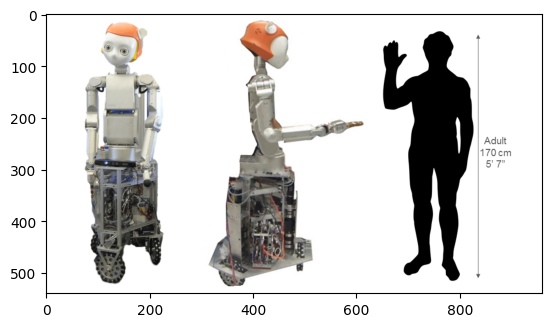

In [39]:
ROBOT_INDEX = 42

row = robot_description.iloc[ROBOT_INDEX]

robot = row['Robot']

plt.imshow(Image.open(f'imgs/{robot}.PNG'));
print(row)

# Load the Average Ratings for the Robot

We just loaded the low-level design features of the robots, now we can view the aggregated responses from the three studies. These are stored in RobotAverages.csv.

Robot                                                 Dreamer
AVERAGE PERCEPTION AND INTERPRETATION RATING        -0.421053
AVERAGE TACTILE INTERACTION AND MOBILITY RATING      1.723684
AVERAGE NONVERBAL INTERACTION RATING                -0.039474
AVERAGE WARMTH RATING                               -0.710526
AVERAGE COMPETENCE RATING                            1.092105
AVERAGE DISCOMFORT RATING                           -0.184211
AVERAGE AMBIGUITY RATING                             5.473684
AVERAGE ATYPICALITY RATING                           4.631579
AVERAGE MASCULINE RATING                            -0.526316
AVERAGE FEMININE RATING                              0.421053
AVERAGE IDENTITY CLOSENESS RATING                    3.947368
AVERAGE LIKEABILITY RATING                                5.0
METAPHOR1 NAME                                       a person
METAPHOR1 COUNT                                             4
AVERAGE METAPHOR1 ABSTRACTION RATING                 5.421053
METAPHOR

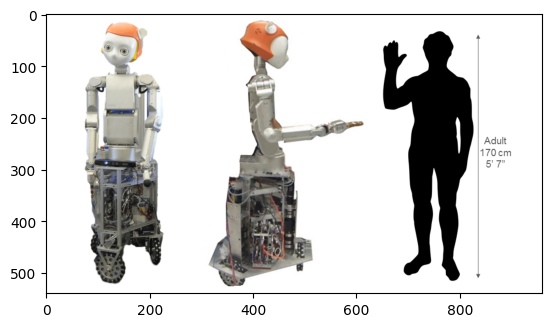

In [40]:
average_expectations = pd.read_csv('RobotAverages.csv')

row = average_expectations.iloc[ROBOT_INDEX]
robot = row['Robot']

plt.imshow(Image.open(f'imgs/{robot}.PNG'));
print(row)

The descriptors of these are located in the accompanying paper of the MUFaSAA datset (https://dl.acm.org/doi/10.1145/3550489), but they are reproduced here for clarity:

### EmCorp Scale (Functional)
Measured on a 7-point Likert Scale
- Shared Perception and Interpretation is a measure of a robot’s perceived perceptual capabilities, such as vision and hearing.
- Tactile Interaction and Mobility is a measure of a robot’s perceived ability to move around
and manipulate objects in space.
- Non-verbal Expressiveness is a measure of a robot’s ability to use natural cues such as gestures and facial expressions.

### RoSAS Scale (Social)
- Warmth is related to the perception that another agent may want to help or harm us.
- Competence is related to the perception that another agent has the ability to help or harm
us.
- Discomfort is related to the awkwardness of a robot.

### Design Ambiguity
the difficulty of placing a robot in a single category. We quantify these measures with differential scales valued from 1 to 9.

### Design Atypicality
a robot having embodiment features not usually associated with the category it represents.

### Robot Gender Expression 
While gender is a complex social phenomenon, we measured perceived gender expression as proposed by the Bem Sex-Role Inventory Scale [9], using two axes—masculinity and femininity—as 7-point Likert scales. This approach allowed for perceptions of androgyny and non-gendered robots within the two axes.


### Identity Closeness
Identity closeness measures the degree of in-group identification of the person with the robot. We used a 9-point differential scale where 1 corresponded to the rater viewing the robot as “not at all like me” and 9 corresponded to the rater identifying the robot as “exactly like me.”

### Likeability: 
Likeability measures the general attitude toward a robot and has been used in other robot assessment studies. It was assessed using a 9-point differential scale, where 1 indicated the rater “strongly dislikes” the robot and 9 indicated that the rater “strongly likes” the robot.

### Metaphor Abstraction Measures
The abstraction level of a metaphor provides a way to quantify how abstractly or literally the robot embodiment follows the metaphor. We quantified
these values as a 9-point differential scale, where 1 represented “highly abstract” interpretations of the design metaphor and 9 represented “highly literal” interpretations of the design
metaphor.

### Social Role
The social role is a measure of the interaction dynamics between the person and robot in an interaction. We used a 9-point differential scale where 1 labeled the robot as “a subordinate,” 5 labeled the robot as “a peer,” and 9 labeled the robot as “a superior.”


# Load the Individual Metaphor Study Responses

We will examine the individual participant responses in the metaphor study, where participants described the robot with natural language and provided 2-5 metaphors of what the robot reminded them of.


In [45]:
metaphor_responses = pd.read_csv('CleanedMetaphorResponses(Study1).csv')

metaphor_responses.query(f'ROBOT=="{robot}"')

PID    ROBOT SEEN SEENCOMMENT  \
389   27  Dreamer   No         NaN   
390   88  Dreamer   No         NaN   
391  158  Dreamer  Yes         NaN   
392  167  Dreamer   No         NaN   
393  181  Dreamer   No         NaN   
394  255  Dreamer   No         NaN   
395  297  Dreamer   No         NaN   
396  313  Dreamer   No         NaN   
397  370  Dreamer   No         NaN   

                                           DESCRIPTION         METAPHOR1  \
389  This robot is a pharmacist. The robot can do w...  Warehouse worker   
390  The base of the robot reminds me of a car engi...        car engine   
391  It looks like an old model of robots. It has t...  Human look alike   
392  It is a robot that is the height of an adult. ...         astro boy   
393  This robot makes me think of a boy who is ridi...               boy   
394  This robot looks like its half human, sort of....             A cat   
395  these new aged robots are kind of reminding me...   johnny number 5   
396  This robot is very large- as tall as a grown p...     A telli-tubby   
397  The robot resembles a catlike person with an o...        young girl   

                                               REASON1             METAPHOR2  \
389                       Arm and hand to carry boxes.            Pharmacist   
390  The base of the robot is a solid block of meta...                 Human   
391                                      irobot movie.  Looks like an alien.   
392  The head sort of reminds me of Astro Boy, a ca...                 t-800   
393  it has a somewhat lifelike upper body and head...             trash can   
394      The ears on this robot remind me of cat ears.               A table   
395  the film short circuit was what i first though...                 nurse   
396  The head reminds me very much of the telli-tub...               A child   
397                                 girl like features          trash barrel   

                                               REASON2 METAPHOR3 REASON3  \
389          Looks like a pharmacist behind a counter.       NaN     NaN   
390  Not only is the robot the same height as an av...       NaN     NaN   
391                               Character in movies.       NaN     NaN   
392  The metal torso reminds me of terminator a lit...       NaN     NaN   
393  the bottom half of the robot reminds me of a c...       NaN     NaN   
394  The base of this robot looks like a table to m...       NaN     NaN   
395  the orange part of their head reminded me of n...       NaN     NaN   
396  The eyes look like a child's eyes, like they a...       NaN     NaN   
397  body is cylinder like with wheels at the botto...       NaN     NaN   

    METAPHOR4 REASON4 METAPHOR5 REASON5    AGE COUNTRY OF SIGNIFICANCE  \
389       NaN     NaN       NaN     NaN  item2           United States   
390       NaN     NaN       NaN     NaN  item3           United States   
391       NaN     NaN       NaN     NaN  item2           United States   
392       NaN     NaN       NaN     NaN  item3           United States   
393       NaN     NaN       NaN     NaN  item2           United States   
394       NaN     NaN       NaN     NaN  item2           United States   
395       NaN     NaN       NaN     NaN  item3           United States   
396       NaN     NaN       NaN     NaN  item2           United States   
397       NaN     NaN       NaN     NaN  item3           United States   

          RACE     GENDER ORIENTATION  
389  ['item1']  ['item1']   ['item3']  
390       none       none   ['item3']  
391  ['item6']  ['item1']   ['item3']  
392  ['item1']  ['item1']   ['item3']  
393  ['item6']  ['item2']   ['item3']  
394  ['item6']  ['item1']   ['item3']  
395  ['item6']  ['item1']   ['item3']  
396  ['item6']  ['item2']   ['item3']  
397  ['item6']  ['item1']   ['item3']

Here is a description of the rows:
- PID - the PID of the participant. Each participant rated up to 5 robots.
- ROBOT - the name of the robot
- SEEN - whether or not the participant has seen the robot before
- SEENCOMMENT - if the participant has seen the robot, where they have seen it.
- DESCRIPTION - a natural language description of the robot
- METAPHOR\<X> - a familiar person, thing, animal, or character that the robot reminds them of
- REASON\<X> - the components of the robot that remind them of the specific metaphor they described
- AGE - participant age group
- COUNTRY OF SIGNIFICANCE - where participants spent a large part of their life (all participants lived in the US)
- RACE - participant race group
- GENDER - participant gender group
- ORIENTATION - participant sexual orientation group

We can also view the specific descriptions participants gave by looking specifically at the description column.

In [48]:
list(metaphor_responses.query(f'ROBOT=="{robot}"')['DESCRIPTION'].values)

['This robot is a pharmacist. The robot can do warehouse work like moving boxes.',
 "The base of the robot reminds me of a car engine with lots of wires coming off of it and three wheels on the bottom. The top of the robot resembles a human, but doesn't have fingers or a mouth. It is as tall as a human.",
 'It looks like an old model of robots. It has the body that looks like not yet developed or improvised, though the robot has a head looks like a human. I think this one is an old model of robot.',
 'It is a robot that is the height of an adult. It has a robotic cartoon head. It has wheels and no legs, but it has a torso that is metal and arms that are metal. Instead of legs, it has a large box and the electronics are exposed.',
 'This robot makes me think of a boy who is riding on either a wheeled trashcan or a segway. The robot has arms but no legs, and seems pretty stable.',
 "This robot looks like its half human, sort of. Its upper body has arms, a chest, neck and head. Its lower 

# Load the Social Expectations Study Responses

We can load the individual data for each robot for the social expectations study, where participants rated the robots' social attributes: RoSAS scale (ratings of 12 adjectives), the robots social role, gender, social identity closeness, and its likeability.

In [49]:
social_responses = pd.read_csv('CleanedSocialResponses(Study2).csv')

social_responses.query(f'ROBOT=="{robot}"')

AGE DEMOGRAPHIC GROUP  Aggressive (Discomfort)  Awkward (Discomfort)  \
834                 item3                     -1.0                  -1.0   
835                 item1                     -3.0                  -3.0   
836                 item2                      2.0                   2.0   
837                 item2                      1.0                  -1.0   
838                 item5                     -2.0                  -2.0   
839                 item3                     -2.0                  -1.0   
840                 item2                     -1.0                   1.0   
841                 item4                     -3.0                   0.0   
842                 item5                     -3.0                  -2.0   
843                 item1                     -1.0                   1.0   
844                 item3                     -1.0                   0.0   
845                 item2                      0.0                   2.0   
846                 item3                     -2.0                   1.0   
847                 item3                      0.0                   2.0   
848                 item1                      0.0                   0.0   
849                 item4                      0.0                   2.0   
850                 item5                      1.0                   3.0   
851                 item6                      0.0                   0.0   
852                 item2                     -1.0                  -1.0   

    COUNTRY OF IMPORTANCE DEMOGRAPHIC GROUP  Capable (Competence)  \
834                           United States                   2.0   
835                           United States                   1.0   
836                           United States                   2.0   
837                           United States                   2.0   
838                           United States                   2.0   
839                                  Turkey                   1.0   
840                           United States                   0.0   
841                           United States                   1.0   
842                           United States                   2.0   
843                           United States                   1.0   
844                           United States                  -1.0   
845                           United States                   0.0   
846                           United States                   1.0   
847                           United States                   0.0   
848    United States minor outlying islands                   0.0   
849                           United States                   1.0   
850                           United States                   1.0   
851                           United States                   0.0   
852                           United States                   2.0   

     Compassionate (Warmth)  Competent  (Competence)  \
834                     1.0                      1.0   
835                    -3.0                      2.0   
836                    -2.0                      2.0   
837                     0.0                      1.0   
838                    -3.0                      2.0   
839                     1.0                      1.0   
840                     1.0                      0.0   
841                    -1.0                      1.0   
842                    -2.0                      2.0   
843                     0.0                      1.0   
844                    -2.0                      1.0   
845                    -1.0                      0.0   
846                    -3.0                      2.0   
847                    -3.0                      0.0   
848                     0.0                      0.0   
849                    -2.0                      1.0   
850                    -2.0                      2.0   
851                     1.0                      1.0   
852                     2.0           

# Load the Functional Expectations Study Responses

We can also load the individual participants' responses for the functinoal expectations study, where participants rated how abstract the robot metaphors were, the EmCorpScale, and the tasks they expect the robot to help do.

In [50]:
functional_responses = pd.read_csv('CleanedFunctionalResponses(Study3).csv')

functional_responses.query(f'ROBOT=="{robot}"')

AGE DEMOGRAPHIC GROUP  AMBIGUITY  ATYPICALITY  \
765                 item2        8.0          5.0   
766                 item6        7.0          7.0   
767                 item4        2.0          1.0   
768                 item3        3.0          3.0   
769                 item2        9.0          7.0   
770                 item2        6.0          3.0   
771                 item4        1.0          4.0   
772                 item2        7.0          7.0   
773                 item5        5.0          2.0   
774                 item3        8.0          8.0   
775                 item1        7.0          2.0   
776                 item2        8.0          8.0   
777                 item3        8.0          8.0   
778                 item3        2.0          3.0   
779                 item1        5.0          4.0   
780                 item1        5.0          5.0   
781                 item5        4.0          3.0   
782                 item2        5.0          7.0   
783                 item5        4.0          1.0   

    COUNTRY OF IMPORTANCE DEMOGRAPHIC GROUP EDUCATION  DEMOGRAPHIC GROUP  \
765                           United States                        item3   
766                           United States                        item2   
767                           United States                        item3   
768                           United States                        item4   
769                           United States                        item4   
770                           United States                        item3   
771                           United States                        item3   
772                           United States                        item2   
773                           United States                        item2   
774                          American Samoa                        item4   
775                           United States                        item3   
776                           United States                        item3   
777                           United States                        item3   
778                           United States                        item3   
779                           United States                        item2   
780                           United States                        item2   
781                           United States                        item3   
782                           United States                        item3   
783                           United States                        item3   

    GENDER  DEMOGRAPHIC GROUP  METAPHOR1 ABSTRACTION RATING  \
765                 ['item1']                           6.0   
766                 ['item1']                           3.0   
767                 ['item2']                           2.0   
768                 ['item2']                           7.0   
769                 ['item2']                           6.0   
770                 ['item1']                           7.0   
771                 ['item1']                           7.0   
772                 ['item2']                           4.0   
773                 ['item2']                           6.0   
774                 ['item1']                           7.0   
775                 ['item1']                           4.0   
776                 ['item1']                           8.0   
777                 ['item1']                           5.0   
778                 ['item2']                           6.0   
779                 ['item1']                           7.0   
780                 ['item2']                           5.0   
781                 ['item2']                           6.0   
782                 ['item1']                           4.0   
783                 ['item1']                           3.0   

     METAPHOR2 ABSTRACTION RATING  METAPHOR3 ABSTRACTION RATING  \
765                           8.0                           4.0   
766                        

If we want to see the individual responses to the metaphors, we can also combine this dataframe with the robot averages dataframe to see what the text of the metaphors were.

METAPHOR1 NAME  METAPHOR1 ABSTRACTION RATING METAPHOR2 NAME  \
0        a person                           6.0     a trashcan   
1        a person                           3.0     a trashcan   
2        a person                           2.0     a trashcan   
3        a person                           7.0     a trashcan   
4        a person                           6.0     a trashcan   
5        a person                           7.0     a trashcan   
6        a person                           7.0     a trashcan   
7        a person                           4.0     a trashcan   
8        a person                           6.0     a trashcan   
9        a person                           7.0     a trashcan   
10       a person                           4.0     a trashcan   
11       a person                           8.0     a trashcan   
12       a person                           5.0     a trashcan   
13       a person                           6.0     a trashcan   
14       a person                           7.0     a trashcan   
15       a person                           5.0     a trashcan   
16       a person                           6.0     a trashcan   
17       a person                           4.0     a trashcan   
18       a person                           3.0     a trashcan   

    METAPHOR2 ABSTRACTION RATING METAPHOR3 NAME  METAPHOR3 ABSTRACTION RATING  
0                            8.0       an alien                           4.0  
1                            2.0       an alien                           2.0  
2                            6.0       an alien                           8.0  
3                            3.0       an alien                           2.0  
4                            7.0       an alien                           7.0  
5                            2.0       an alien                           5.0  
6                            4.0       an alien                           2.0  
7                            2.0       an alien                           6.0  
8                            1.0       an alien                           7.0  
9                            6.0       an alien                           7.0  
10                           8.0       an alien                           5.0  
11                           7.0       an alien                           8.0  
12                           1.0       an alien                           4.0  
13                           7.0       an alien                           8.0  
14                           6.0       an alien                           5.0  
15                           1.0       an alien                           6.0  
16                           1.0       an alien                           8.0  
17                           5.0       an alien                           7.0  
18                           3.0       an alien                           2.0

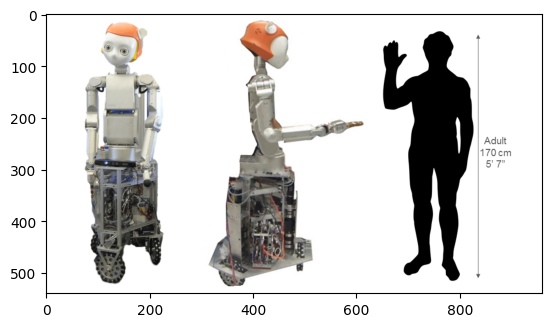

In [60]:
robot_specific_data = functional_responses.query(f'ROBOT=="{robot}"')

#combine the functional data, which has the abstraction ratings, with the robot average data, which has the metaphor names
robot_specific_data = robot_specific_data.merge(average_expectations, left_on='ROBOT', right_on="Robot")
plt.imshow(Image.open(f'imgs/{robot}.PNG'));

robot_specific_data[['METAPHOR1 NAME','METAPHOR1 ABSTRACTION RATING', 'METAPHOR2 NAME','METAPHOR2 ABSTRACTION RATING', 'METAPHOR3 NAME','METAPHOR3 ABSTRACTION RATING']]